In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
nascimento = pd.read_csv("births.csv")
nascimento.head(10)

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
5,1969,1,3.0,M,4994
6,1969,1,4.0,F,4440
7,1969,1,4.0,M,4520
8,1969,1,5.0,F,4192
9,1969,1,5.0,M,4198


In [9]:
#Transformar todos os valores nulos em 0 na coluna dia
nascimento['day'].fillna(0, inplace=True)
#Transformar a coluna dia em int
nascimento['day'] = nascimento['day'].astype(int)
#Mostrar o dataset
nascimento

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548
...,...,...,...,...,...
15542,2008,10,0,M,183219
15543,2008,11,0,F,158939
15544,2008,11,0,M,165468
15545,2008,12,0,F,173215


In [14]:
nascimento['decade'] = 10*(nascimento['year']//10)
nascimento.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
nascimento

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,0,M,183219,2000
15543,2008,11,0,F,158939,2000
15544,2008,11,0,M,165468,2000
15545,2008,12,0,F,173215,2000


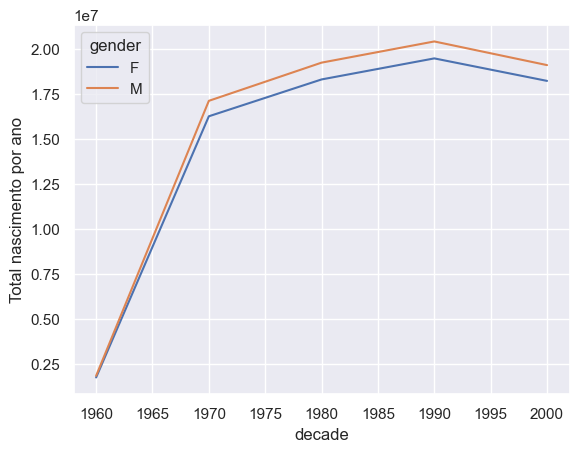

In [16]:
#Verificar a quantidade de nascimento por ano

decada_nascimento = nascimento.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
decada_nascimento.plot()
plt.ylabel("Total nascimento por ano")
plt.show()

In [18]:
# Criar os quartis e o uso de 0,74 é uma distribuição gaussiana

quartils = np.percentile(nascimento['births'], [25,50,75])
mu = quartils[1]
sig = 0.74 * (quartils[2] - quartils[0])

In [29]:
nascimento = nascimento.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
nascimento['day'] = nascimento['day'].astype(int)
nascimento.index = pd.to_datetime(10000 * nascimento.year + 100 * nascimento.month + nascimento.day, format='%Y%m%d')

nascimento['dayofweek'] = nascimento.index.dayofweek

C:\Users\luan.gomes\AppData\Local\Temp\ipykernel_15180\1511562428.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom'])


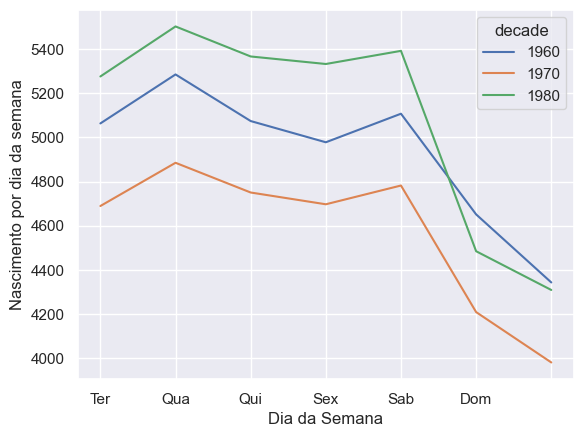

In [30]:
#Identificar os nascimentos por dia da semana

nascimento.pivot_table('births', index='Dia da Semana', columns='decade',
                      aggfunc='mean').plot()
plt.gca().set_xticklabels(['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom'])
plt.ylabel('Nascimento por dia da semana');
plt.show()

In [40]:
# Média de nascimento por dia do ano
nascimento_mes = nascimento.pivot_table('births', [nascimento.index.month, nascimento.index.day])
nascimento_mes.index = [pd.to_datetime('2012-{}-{}'.format(month, day)) for (month, day) in nascimento_mes.index]
nascimento_mes.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


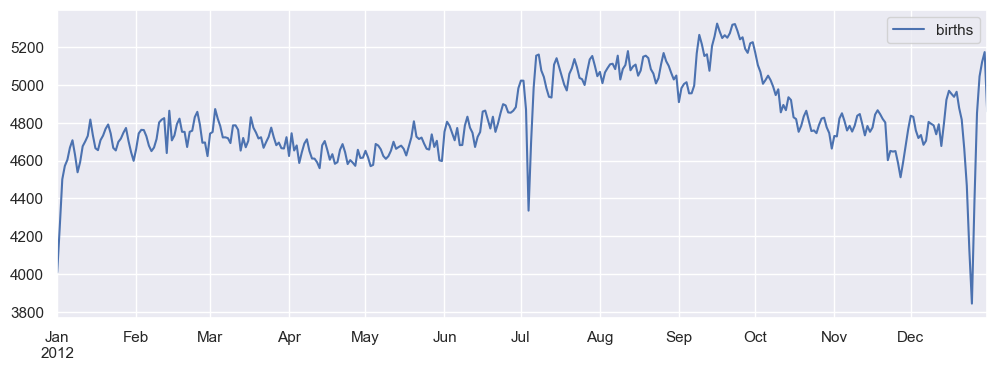

In [41]:
fig, ax = plt.subplots(figsize=(12,4))
nascimento_mes.plot(ax=ax)
plt.show()